#### This is an Artificial Neural Network built to solve a regression problem of predicting car sales/purchase amount. Data is from [kaggle](https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction/data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd

In [2]:
file = "car_purchasing.csv"  
dataset = pd.read_csv(file, encoding = "ISO-8859-1")

In [3]:
dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
dataset.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [6]:
#Customer names and emails will most likely contribute nothing to the amount of car sales

dataset = dataset.drop(["customer name", "customer e-mail"], axis = 1)

In [7]:
dataset.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [8]:
dataset["country"].nunique()

211

In [9]:
#Realistically, while the country of residence of a person could really influence the amount of car purchase, there are too many different represented countries. It could make more sense to drop this column.

dataset = dataset.drop("country", axis = 1)

In [10]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [14]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
model = Sequential()

In [16]:
#input layer
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.2))

#output layer
model.add(Dense(1))

#compiling model
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [17]:
model.fit(x = x_train, y = y_train, epochs = 100, batch_size = 32, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2058018816.0000 - val_loss: 2128485760.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2041951488.0000 - val_loss: 2128433920.0000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2068708736.0000 - val_loss: 2128375936.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2026818176.0000 - val_loss: 2128305792.0000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2036909696.0000 - val_loss: 2128219392.0000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2090763904.0000 - val_loss: 2128111872.0000
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2107357312.0000 - val_loss: 2127978880.0000
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2052941312.0000 - val_loss: 2127812096.0000
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2095325952.0000 - val_loss: 2127600000.0000
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2056941184.00

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1822654976.0000 - val_loss: 1917299840.0000
Epoch 61/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1778474240.0000 - val_loss: 1907197440.0000
Epoch 62/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1814054656.0000 - val_loss: 1896881024.0000
Epoch 63/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1814042240.0000 - val_loss: 1886267520.0000
Epoch 64/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1804764288.0000 - val_loss: 1875392128.0000
Epoch 65/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1783990784.0000 - val_loss: 1864346880.0000
Epoch 66/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1770982656.0000 - val_loss: 1853014656.0000
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1803825408.0000 - val_loss: 1841358848.0000
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1776487808.0000 - val_loss: 1829626752.0000
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1730393472.0000 -

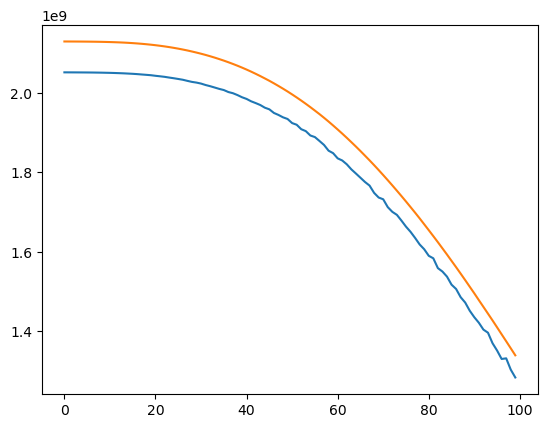

In [18]:
plt.plot(pd.DataFrame(model.history.history))

In [19]:
#judging by the results of the model, it could be interesting to try out different different parameters in terms of units of neurons and drop out percentages to arrive at the best possible model

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1990456576.0000 - val_loss: 2128518144.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2002800896.0000 - val_loss: 2128497536.0000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2058416512.0000 - val_loss: 2128471552.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2116025216.0000 - val_loss: 2128437376.0000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2016715136.0000 - val_loss: 2128391936.0000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2003278464.0000 - val_loss: 2128328960.0000
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2094116608.0000 - val_loss: 2128239872.0000
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2017979776.0000 - val_loss: 2128127232.0000
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2073584512.0000 - val_loss: 2127985408.0000
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2039570048.00

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1848745984.0000 - val_loss: 1972886272.0000
Epoch 61/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1889163520.0000 - val_loss: 1965304960.0000
Epoch 62/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1849654144.0000 - val_loss: 1957456128.0000
Epoch 63/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1866970496.0000 - val_loss: 1949355904.0000
Epoch 64/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1911631872.0000 - val_loss: 1940973696.0000
Epoch 65/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1822893568.0000 - val_loss: 1932432256.0000
Epoch 66/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1837870208.0000 - val_loss: 1923684608.0000
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1860098048.0000 - val_loss: 1914658560.0000
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1859132160.0000 - val_loss: 1905546880.0000
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1820973440.0000 -

Epoch 19/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2091814400.0000 - val_loss: 2123286400.0000
Epoch 20/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2091188480.0000 - val_loss: 2122370176.0000
Epoch 21/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2036291968.0000 - val_loss: 2121357696.0000
Epoch 22/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2113167360.0000 - val_loss: 2120214912.0000
Epoch 23/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2054826112.0000 - val_loss: 2118956928.0000
Epoch 24/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2068852096.0000 - val_loss: 2117603072.0000
Epoch 25/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1983215488.0000 - val_loss: 2116146688.0000
Epoch 26/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2037490048.0000 - val_loss: 2114546048.0000
Epoch 27/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1980001152.0000 - val_loss: 2112801280.0000
Epoch 28/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2042

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1697790336.0000 - val_loss: 1739238144.0000
Epoch 79/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1716062080.0000 - val_loss: 1725513856.0000
Epoch 80/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1692807168.0000 - val_loss: 1712043648.0000
Epoch 81/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1638418304.0000 - val_loss: 1698252544.0000
Epoch 82/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1644396544.0000 - val_loss: 1684210688.0000
Epoch 83/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1600555136.0000 - val_loss: 1670116864.0000
Epoch 84/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1600586752.0000 - val_loss: 1655777536.0000
Epoch 85/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1614458368.0000 - val_loss: 1641047040.0000
Epoch 86/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1584604160.0000 - val_loss: 1626295040.0000
Epoch 87/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1560586240.0000 -

Epoch 37/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2013434368.0000 - val_loss: 2082174720.0000
Epoch 38/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1969342336.0000 - val_loss: 2078051072.0000
Epoch 39/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1989876736.0000 - val_loss: 2073639808.0000
Epoch 40/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2011452416.0000 - val_loss: 2069037568.0000
Epoch 41/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1934687360.0000 - val_loss: 2064232064.0000
Epoch 42/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2027190784.0000 - val_loss: 2059192576.0000
Epoch 43/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1954921984.0000 - val_loss: 2053900800.0000
Epoch 44/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2035320064.0000 - val_loss: 2048372480.0000
Epoch 45/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1979378048.0000 - val_loss: 2042546048.0000
Epoch 46/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1967

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1293207936.0000 - val_loss: 1407020288.0000
Epoch 97/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1332975744.0000 - val_loss: 1389012352.0000
Epoch 98/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1318651008.0000 - val_loss: 1371095552.0000
Epoch 99/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1258529920.0000 - val_loss: 1353128320.0000
Epoch 100/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1289133952.0000 - val_loss: 1334940032.0000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000017C261F40D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside o

Epoch 44/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1710906752.0000 - val_loss: 1801687424.0000
Epoch 45/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1714261120.0000 - val_loss: 1779985280.0000
Epoch 46/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1685684608.0000 - val_loss: 1757448704.0000
Epoch 47/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1645428096.0000 - val_loss: 1734181376.0000
Epoch 48/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1646416384.0000 - val_loss: 1710152704.0000
Epoch 49/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1654747520.0000 - val_loss: 1685500160.0000
Epoch 50/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1608640256.0000 - val_loss: 1660133632.0000
Epoch 51/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1609325696.0000 - val_loss: 1634283136.0000
Epoch 52/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1544729856.0000 - val_loss: 1607682432.0000
Epoch 53/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1515

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2020656384.0000 - val_loss: 2128359040.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1984435968.0000 - val_loss: 2128222208.0000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2014003712.0000 - val_loss: 2128029952.0000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2059669888.0000 - val_loss: 2127764608.0000
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2065116800.0000 - val_loss: 2127404032.0000
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2039815808.0000 - val_loss: 2126925056.0000
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2047881856.0000 - val_loss: 2126301440.0000
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2047279744.0000 - val_loss: 2125498880.0000
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2020245504.0000 - val_loss: 2124480896.0000
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2011963264.0000 - val_l

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1332900736.0000 - val_loss: 1343453184.0000
Epoch 63/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1265063936.0000 - val_loss: 1313003136.0000
Epoch 64/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1275340032.0000 - val_loss: 1282271616.0000
Epoch 65/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1217600256.0000 - val_loss: 1251761920.0000
Epoch 66/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1146481152.0000 - val_loss: 1220885632.0000
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1145150336.0000 - val_loss: 1189699200.0000
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1138111232.0000 - val_loss: 1158782080.0000
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1023608448.0000 - val_loss: 1127745024.0000
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1057775936.0000 - val_loss: 1096254464.0000
Epoch 71/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1031721920.0000 -

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2014949120.0000 - val_loss: 2103119232.0000
Epoch 22/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2058704768.0000 - val_loss: 2098814208.0000
Epoch 23/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2006140544.0000 - val_loss: 2094130560.0000
Epoch 24/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2048504832.0000 - val_loss: 2089018368.0000
Epoch 25/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2039819904.0000 - val_loss: 2083368704.0000
Epoch 26/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2022779392.0000 - val_loss: 2077248000.0000
Epoch 27/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1967798144.0000 - val_loss: 2070549248.0000
Epoch 28/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1981180672.0000 - val_loss: 2063266176.0000
Epoch 29/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1954940288.0000 - val_loss: 2055469824.0000
Epoch 30/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2025242624.0000 -

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 895098432.0000 - val_loss: 910703680.0000
Epoch 81/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 890812928.0000 - val_loss: 881972608.0000
Epoch 82/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 837126464.0000 - val_loss: 853507008.0000
Epoch 83/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 809145344.0000 - val_loss: 825389696.0000
Epoch 84/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 814166656.0000 - val_loss: 797534336.0000
Epoch 85/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 700626688.0000 - val_loss: 770541760.0000
Epoch 86/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 755106560.0000 - val_loss: 743329216.0000
Epoch 87/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 760766336.0000 - val_loss: 717010880.0000
Epoch 88/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 699739456.0000 - val_loss: 690975040.0000
Epoch 89/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 677409472.0000 - val_loss: 66564192

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1454365824.0000 - val_loss: 1492700160.0000
Epoch 40/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1454720896.0000 - val_loss: 1448328448.0000
Epoch 41/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1336227456.0000 - val_loss: 1403641600.0000
Epoch 42/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1315527296.0000 - val_loss: 1357777024.0000
Epoch 43/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1311624832.0000 - val_loss: 1310721024.0000
Epoch 44/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1261408896.0000 - val_loss: 1263164416.0000
Epoch 45/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1184136960.0000 - val_loss: 1214748288.0000
Epoch 46/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1109477760.0000 - val_loss: 1166366720.0000
Epoch 47/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1096142720.0000 - val_loss: 1116774528.0000
Epoch 48/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1031566784.0000 -

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108048672.0000 - val_loss: 101273280.0000
Epoch 100/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115921032.0000 - val_loss: 100562384.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2152543744.0000 - val_loss: 2128515072.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2101059456.0000 - val_loss: 2128428416.0000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2086670464.0000 - val_loss: 2128275328.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2066627200.0000 - val_loss: 2128008832.0000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1980917888.0000 - val_loss: 2127561344.0000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2015359744.0000 - val_loss: 2126848384.0000
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2018347264.0000 - val_loss: 2125771008.0000
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 498694752.0000 - val_loss: 515519200.0000
Epoch 59/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 437957408.0000 - val_loss: 479447840.0000
Epoch 60/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 414595840.0000 - val_loss: 444715616.0000
Epoch 61/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 383890048.0000 - val_loss: 412498400.0000
Epoch 62/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 376695200.0000 - val_loss: 382258688.0000
Epoch 63/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 355544864.0000 - val_loss: 354059648.0000
Epoch 64/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 314679072.0000 - val_loss: 327859328.0000
Epoch 65/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 303938624.0000 - val_loss: 304099872.0000
Epoch 66/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 294338400.0000 - val_loss: 282016672.0000
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301314080.0000 - val_loss: 26123153

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2018482560.0000 - val_loss: 2081771520.0000
Epoch 18/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1993923840.0000 - val_loss: 2071712896.0000
Epoch 19/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1967666048.0000 - val_loss: 2060198272.0000
Epoch 20/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1937102464.0000 - val_loss: 2047168768.0000
Epoch 21/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1988613888.0000 - val_loss: 2032576256.0000
Epoch 22/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2035897728.0000 - val_loss: 2016383488.0000
Epoch 23/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1953218688.0000 - val_loss: 1998492288.0000
Epoch 24/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1967874176.0000 - val_loss: 1978979584.0000
Epoch 25/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1860468608.0000 - val_loss: 1957729920.0000
Epoch 26/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1915881216.0000 -

Epoch 77/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192929040.0000 - val_loss: 166471920.0000
Epoch 78/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 166709280.0000 - val_loss: 158952176.0000
Epoch 79/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 166722224.0000 - val_loss: 152167664.0000
Epoch 80/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 176701120.0000 - val_loss: 146124736.0000
Epoch 81/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 178676912.0000 - val_loss: 140239664.0000
Epoch 82/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155617424.0000 - val_loss: 135178928.0000
Epoch 83/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 170481984.0000 - val_loss: 130751176.0000
Epoch 84/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180361040.0000 - val_loss: 127020256.0000
Epoch 85/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 143269120.0000 - val_loss: 123925528.0000
Epoch 86/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 138280160.0000 - val_l

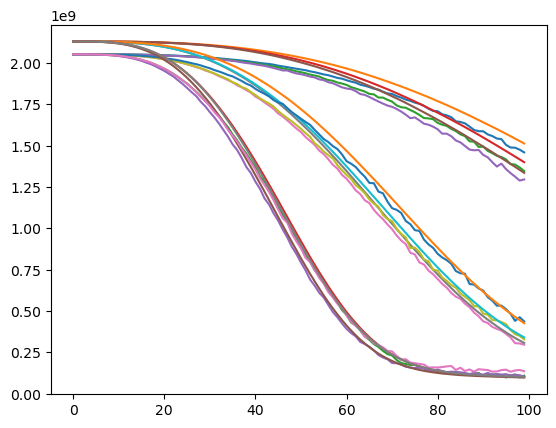

In [21]:
minimum_error = float("inf")
optimum_model = None

parameters = {"unit": [32, 64, 128], "dropout_percentage":[0.2, 0.3, 0.4]}

for unit in parameters["unit"]:
    for dropout_percentage in parameters["dropout_percentage"]:
        #initiliaze model
        model = Sequential()

        #input layer
        model.add(Dense(unit, activation = "relu"))
        model.add(Dropout(dropout_percentage))

        #hidden layer
        model.add(Dense(unit//2, activation = "relu"))
        model.add(Dropout(dropout_percentage))

        #output layer
        model.add(Dense(1))

        #compiling model
        model.compile(optimizer = "adam", loss = "mean_squared_error")

        #train model
        training = model.fit(x = x_train, y = y_train, epochs = 100, batch_size = 32, validation_data = (x_test, y_test), verbose = 1)
        plt.plot(pd.DataFrame(model.history.history))

        #calculating predictions
        predictions = model.predict(x_test)
        error = mean_squared_error(predictions, y_test)

        if error < minimum_error:
            minimum_error =  error
            optimum_model = model

In [25]:
optimum_predictions = optimum_model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


In [26]:
print(minimum_error)

98765267.487979


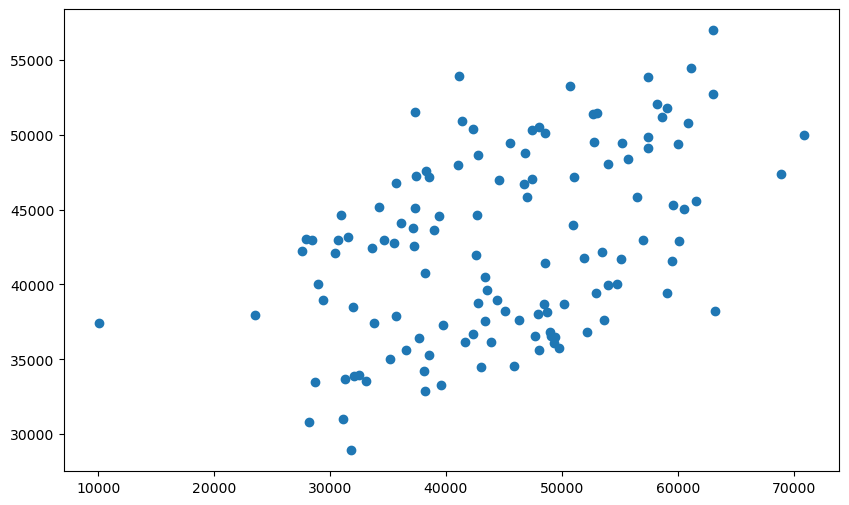

In [29]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, optimum_predictions)

In [30]:
#Judging by the results of the graph, a better model is probably achievable by further adjusting model parameters like neurons, epochs, batch size, etc. For now, we'll take this.

In [37]:
print(mean_absolute_error(optimum_predictions, y_test))

8298.063655955
